In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy import optimize,stats,special
import mplhep as hep

In [20]:
# plt.style.available
plt.style.use("seaborn-paper")
mpl.rcParams.update({
    'font.family': 'STIXGeneral',
    # 'font.sans-serif': ['Times New Roman'],
    'mathtext.default':'rm',
    'mathtext.fontset':'stix',
    'mathtext.fallback_to_cm':False,
    "axes.titlesize" : 24,
"axes.labelsize" : 20,
"lines.linewidth" : 3,
"lines.markersize" : 10,
"xtick.labelsize" : 16,
"ytick.labelsize" : 16,
'savefig.dpi':300,
'legend.fontsize':13,
'figure.figsize':(8,6)
    })
plt.rcParams['axes.unicode_minus'] = False


/Users/sitianqian/opt/miniconda3/envs/skhep/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Users/sitianqian/opt/miniconda3/envs/skhep/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/Users/sitianqian/opt/miniconda3/envs/skhep/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


In [21]:
datadir = "../data/"
key1 = ["Cu","Zn","Fe","Ge","Cr"]
key2 = ['X1',"X2",'X3']
key3 = ['2t','4t','6t','8t','10t']
key4 = ['55Fe']
datasuffix = ".dat.txt"

data1 = {key:np.loadtxt(f'{datadir}{key}{datasuffix}') for key in key1}
data2 = {key:np.loadtxt(f'{datadir}{key}{datasuffix}') for key in key2}
data3 = {key:np.loadtxt(f'{datadir}{key}{datasuffix}') for key in key3}
data4 = {key:np.loadtxt(f'{datadir}{key}{datasuffix}') for key in key4}

channel = np.arange(0,1024)
edge = np.arange(-0.5,1023.5)

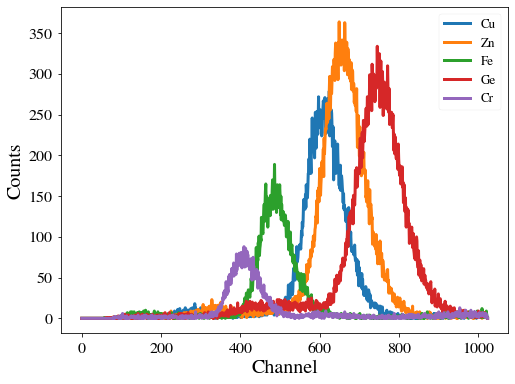

In [22]:
for key in key1:
    plt.plot(channel,data1[key],label = key)
plt.legend()
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.savefig("../plot/Calibration.pdf")

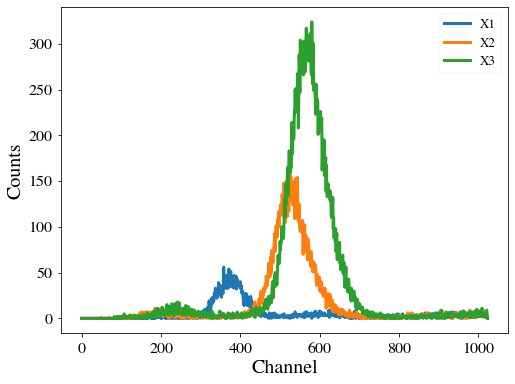

In [23]:
for key in key2:
    plt.plot(channel,data2[key],label = key)
plt.legend()
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.savefig("../plot/Prediction.pdf")

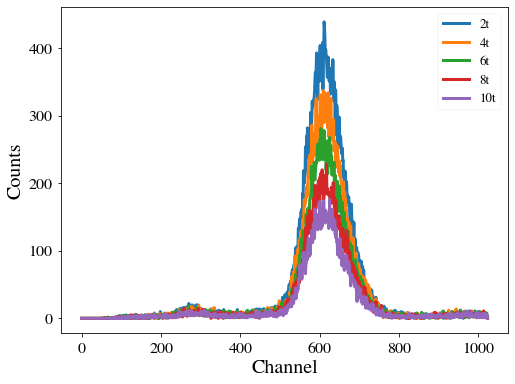

In [24]:
for key in key3:
    plt.plot(channel,data3[key],label = key)
plt.legend()
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.savefig("../plot/Absorption.pdf")

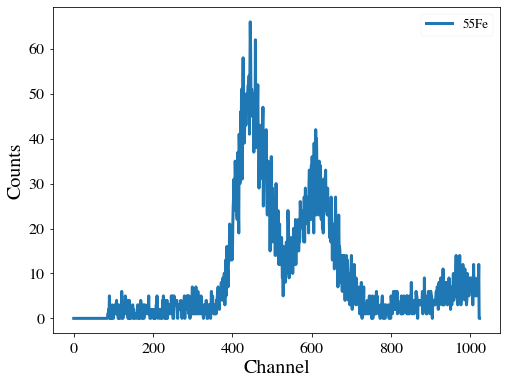

In [25]:
for key in key4:
    plt.plot(channel,data4[key],label = key)
plt.legend()
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.savefig("../plot/55Fe.pdf")

In [26]:
def gauss_with_norm(x,mean,sigma,norm):
    return stats.norm.pdf(x,loc = mean,scale = sigma) * norm

In [27]:
popt,pvar = optimize.curve_fit(gauss_with_norm,channel,data1['Cu'],p0=[600,10,100])

In [28]:
def gaussian_fit(y,x = channel,p0=None):
    popt,pvar = optimize.curve_fit(gauss_with_norm,x,y,p0=p0)
    return popt

In [29]:
test = gauss_with_norm(channel,mean=popt[0],sigma = popt[1],norm = popt[2])

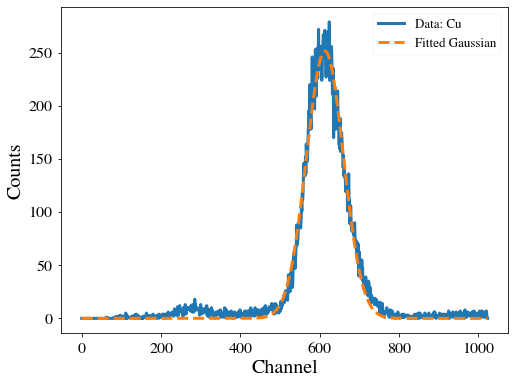

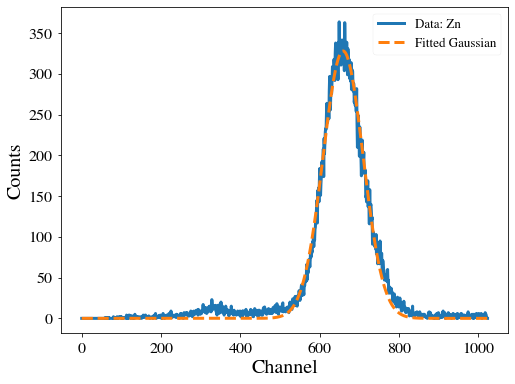

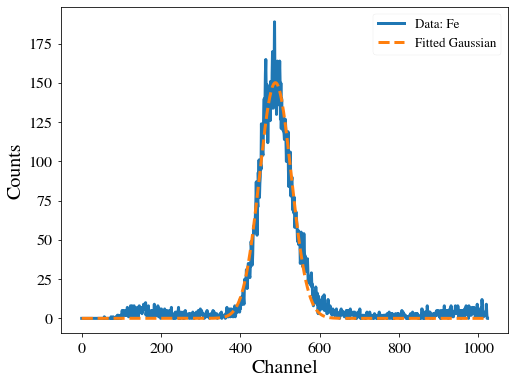

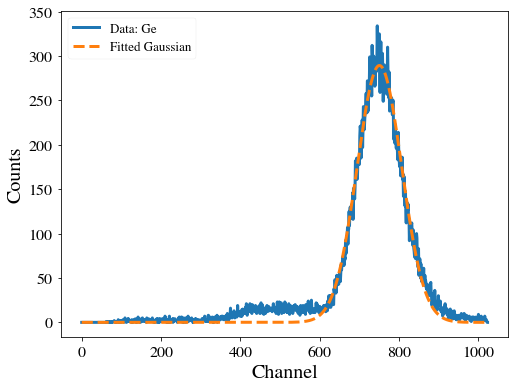

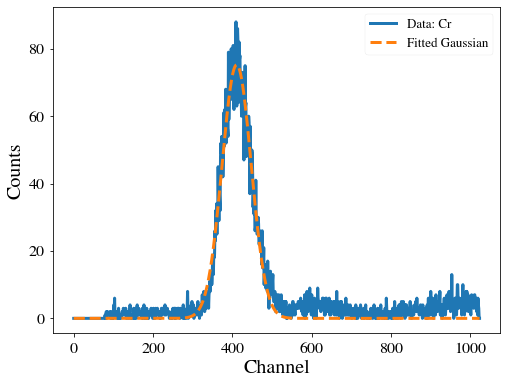

In [30]:
mu1 = {}

for key in key1:
    mu,sigma,norm = gaussian_fit(y=data1[key],p0=[600,10,50])
    tmp = gauss_with_norm(channel,mean=mu,sigma = sigma,norm = norm)
    plt.figure()
    plt.plot(data1[key])
    plt.plot(tmp,"--",linewidth = 3)
    plt.xlabel("Channel")
    plt.ylabel("Counts")
    plt.legend([f"Data: {key}","Fitted Gaussian"])
    mu1[key] = mu
    plt.savefig(f"../plot/Fitted_{key}.pdf")

In [31]:
mu1

{'Cu': 613.1718582503914,
 'Zn': 658.9204366331171,
 'Fe': 488.210136888735,
 'Ge': 750.4339841501271,
 'Cr': 410.6951971545783}

In [32]:
k_alpha = {"Fe":6.403,"Cu":8.047,"Zn":8.638,"Ge":9.885,"Cr":5.414}

In [33]:
df1 = pd.DataFrame([mu1,k_alpha]).T
df1.columns = ["Channel","K_alpha"]

In [35]:
import statsmodels.api as sm

In [36]:
X = sm.add_constant(df1.Channel)

In [37]:
Y = df1.K_alpha

In [38]:
model1 = sm.OLS(Y,X)

In [39]:
model1_res = model1.fit()

In [40]:
model1_res.summary()

/Users/sitianqian/opt/miniconda3/envs/skhep/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                K_alpha   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.454e+04
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           5.73e-07
Time:                        10:17:45   Log-Likelihood:                 13.103
No. Observations:                   5   AIC:                            -22.21
Df Residuals:                       3   BIC:                            -22.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0030      0.050     -0.061      0.955      -0.162       0.156
Channel        0.0131   8.39e-05    156.666      0.000       0.013       0.013
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.932
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.673
Skew:                           0.304   Prob(JB):                        0.714
Kurtosis:                       1.309   Cond. No.                     2.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
def lm1(x):
    return x*0.0131  - 0.0030

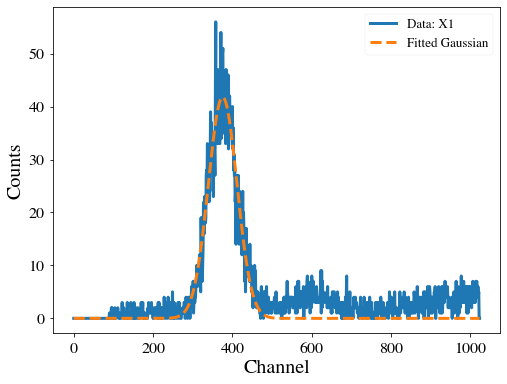

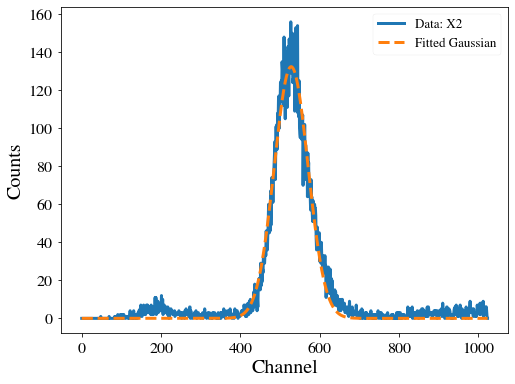

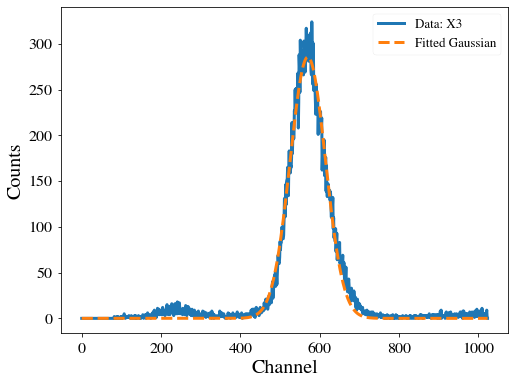

In [42]:
mu2 = {}

for key in key2:
    mu,sigma,norm = gaussian_fit(y=data2[key],p0=[600,10,50])
    tmp = gauss_with_norm(channel,mean=mu,sigma = sigma,norm = norm)
    plt.figure()
    plt.plot(data2[key])
    plt.plot(tmp,"--",linewidth = 3)
    plt.xlabel("Channel")
    plt.ylabel("Counts")
    plt.legend([f"Data: {key}","Fitted Gaussian"])
    mu2[key] = mu
    plt.savefig(f"../plot/Fitted_{key}.pdf")

In [43]:
df2 = pd.DataFrame([mu2]).T
df2.columns = ["Channel"]
X2 = sm.add_constant(df2.Channel)
df2['K_alpha'] = model1_res.predict(X2)

In [44]:
df2

,Channel,K_alpha
X1,375.413539,4.931769
X2,527.960351,6.936996
X3,569.945123,7.488885


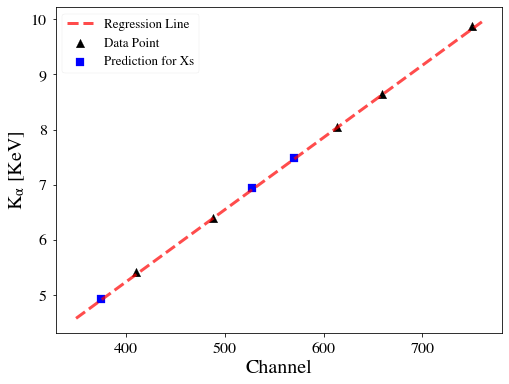

In [45]:
plt.plot(np.linspace(350,760),lm1(np.linspace(350,760)),"--",color = "red",label="Regression Line",alpha=0.7)
plt.scatter(df1.Channel,df1.K_alpha,marker="^",s=75,color="black",label = "Data Point")
plt.scatter(df2.Channel,df2.K_alpha,marker="s",s=75,color="blue",label="Prediction for Xs")
plt.legend()
plt.xlabel("Channel")
plt.ylabel("$K_\\alpha$ [$KeV$]")
plt.savefig("../plot/LinearReg1.pdf")

X1 -> V  

X2 -> Co 

X3 -> Ni

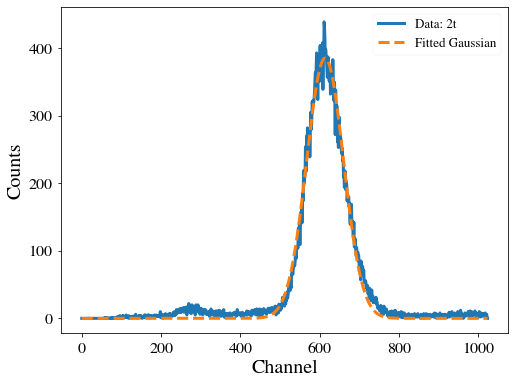

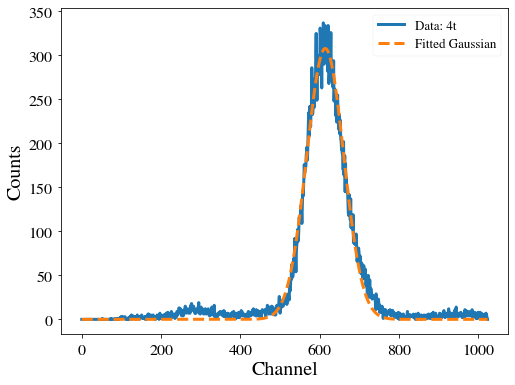

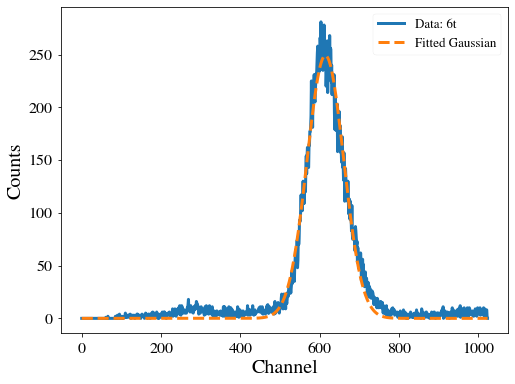

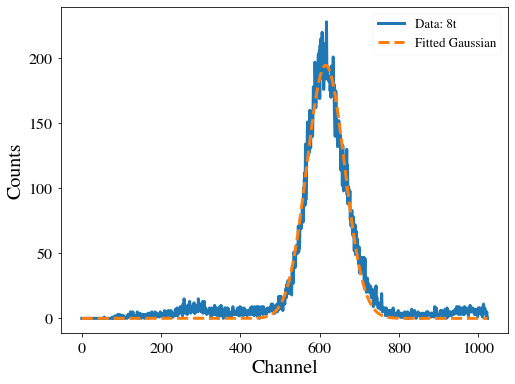

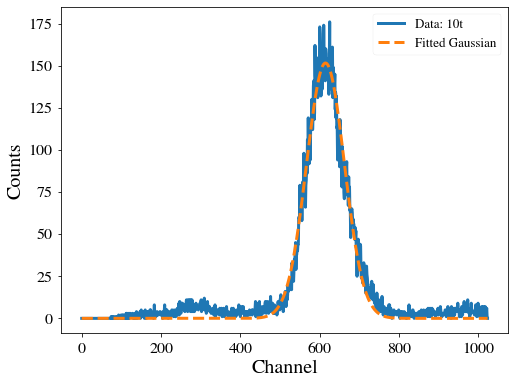

In [46]:
mu3 = {}
sigma3 = {}
norm3 = {}
deepth3 = {}

# mu,sigma,norm = gaussian_fit(y=data1['Cu'],p0=[600,10,50])
# tmp = gauss_with_norm(channel,mean=mu,sigma = sigma,norm = norm)
# plt.figure()
# plt.plot(data1['Cu'])
# plt.plot(tmp,"--",linewidth = 3)
# plt.xlabel("Channel")
# plt.ylabel("Counts")
# plt.legend([f"Data: 0t","Fitted Gaussian"])
# mu3['0t'] = mu
# sigma3['0t'] = sigma
# norm3['0t'] = norm
# deepth3['0t'] = 0

for key in key3:
    mu,sigma,norm = gaussian_fit(y=data3[key],p0=[600,10,50])
    tmp = gauss_with_norm(channel,mean=mu,sigma = sigma,norm = norm)
    plt.figure()
    plt.plot(data3[key])
    plt.plot(tmp,"--",linewidth = 3)
    plt.xlabel("Channel")
    plt.ylabel("Counts")
    plt.legend([f"Data: {key}","Fitted Gaussian"])
    mu3[key] = mu
    sigma3[key] = sigma
    norm3[key] = norm
    deepth3[key] = eval(key[:-1]) * 2.15
    plt.savefig(f"../plot/Fitted_{key}.pdf")

In [47]:
df3 = pd.DataFrame([mu3,sigma3,norm3,deepth3]).T
df3.columns  = ['Channel','Sigma','Norm','Deepth']

In [48]:
df3

,Channel,Sigma,Norm,Deepth
2t,613.556431,46.472331,44897.093719,4.3
4t,613.825690,46.528849,35904.350771,8.6
6t,614.249506,45.902282,28660.194336,12.9
8t,615.013192,47.391300,23116.889440,17.2
10t,614.502350,47.633606,18097.904938,21.5


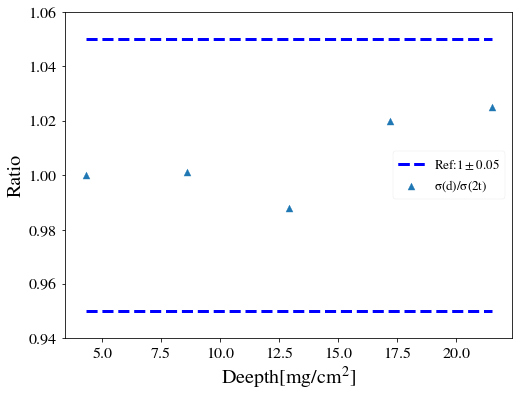

In [49]:

plt.ylim([0.94,1.06])
l1, = plt.plot(df3.Deepth,np.ones_like(df3.Deepth)*1.05,"--",color = 'b',label = "Ref: 1.05")
l2, = plt.plot(df3.Deepth,np.ones_like(df3.Deepth)*0.95,"--",color = 'b',label = "Ref: 0.95")
s1 = plt.scatter(df3.Deepth,df3.Sigma/df3.Sigma[0],s=50,marker="^",label = "Sigma(d)/Sigma(2t)")
plt.legend([(l1,l2),s1],["Ref:$1 \pm 0.05$",'$\sigma  (d)/\sigma (2t)$'])
plt.ylabel("Ratio")
plt.xlabel("Deepth[$mg/cm^2$]")
plt.savefig("../plot/fitted_sigma.pdf")

### Scheme 1: using fitted curve only
If we choose FWHM: $S = A*\text{erf}{(\sqrt{2}\ln{2})}$
Then we have $S\propto A = A_0\exp(-\mu*d)$
Thus $\log{A} = \log{A_0} + -\mu*d $

In [50]:
X3_1 = sm.add_constant(df3.Deepth)
Y3_1 = np.log(df3.Norm)
Y3_1.name = "logNorm"

In [51]:
model3 = sm.OLS(Y3_1,X3_1)
model3_res = model3.fit()
model3_res.summary()

/Users/sitianqian/opt/miniconda3/envs/skhep/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logNorm   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7994.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           3.08e-06
Time:                        10:17:51   Log-Likelihood:                 18.334
No. Observations:                   5   AIC:                            -32.67
Df Residuals:                       3   BIC:                            -33.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9404      0.008   1306.442      0.000      10.914      10.967
Deepth        -0.0525      0.001    -89.407      0.000      -0.054      -0.051
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.529
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.370
Skew:                           0.622   Prob(JB):                        0.831
Kurtosis:                       2.525   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
def lm2(x):
    return x*-0.0525 + 10.9404	

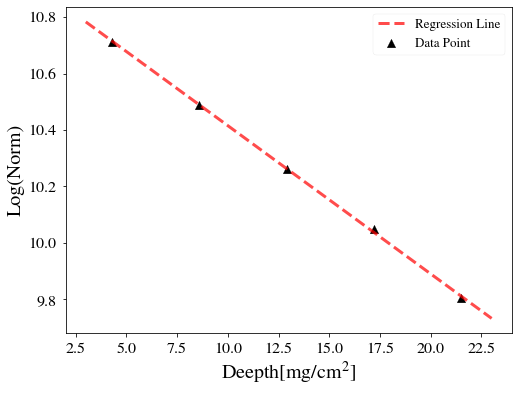

In [53]:
plt.plot(np.linspace(3,23),lm2(np.linspace(3,23)),"--",color = "red",label="Regression Line",alpha=0.7)
# plt.scatter(df1.Channel,df1.K_alpha,marker="^",s=75,color="black",label = "Data Point")
plt.scatter(df3.Deepth,np.log(df3.Norm),marker="^",s=75,color="black",label="Data Point")
plt.legend()
plt.xlabel("Deepth[$mg/cm^2$]")
plt.ylabel("Log(Norm)")
plt.savefig("../plot/LinearReg2.pdf")

In [54]:
df1.T.to_latex("../Report/tab1.tex")

In [55]:
model1_res.rsquared

0.9998777873189114

In [56]:
df2.T.to_latex("../Report/tab2.tex")

In [57]:
df2

,Channel,K_alpha
X1,375.413539,4.931769
X2,527.960351,6.936996
X3,569.945123,7.488885
